In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, mean_squared_error

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaliningrad_weather_19102020_15102011.csv', encoding = "windows-1251",  sep=";")

In [ ]:
df

,LocalTime,T,Po,P,Pa,U,DD
0,19.10.2020 11:00,8.0,761.2,762.5,NaN,83.0,Ветер
1,19.10.2020 08:00,5.3,760.0,761.3,NaN,90.0,Ветер
2,19.10.2020 05:00,3.1,759.2,760.6,NaN,94.0,Ветер
3,19.10.2020 02:00,2.9,758.2,759.6,NaN,90.0,Ветер
4,18.10.2020 23:00,3.0,757.2,758.5,NaN,91.0,Ветер
...,...,...,...,...,...,...,...
26264,15.10.2011 14:00,9.0,773.2,775.2,NaN,64.0,Штиль
26265,15.10.2011 11:00,7.6,773.3,775.3,NaN,68.0,Ветер
26266,15.10.2011 08:00,4.7,772.9,774.9,NaN,93.0,Ветер
26267,15.10.2011 05:00,4.9,772.4,774.4,NaN,94.0,Штиль


Перегоним категориальный столбец в числовой формат

In [ ]:
df['DD_binary']=0
for k in range(0, len(df['DD'])):
  if df['DD'].iloc[k]=='Ветер':
    df['DD_binary'].iloc[k]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df=df.drop(columns=['DD', 'LocalTime'], axis=1)

Удалим пропуски

In [ ]:
df=df.dropna()

In [ ]:
X = df.drop(['T'], axis=1)
y = df['T']

In [ ]:
X

,Po,P,Pa,U,DD_binary
624,758.2,760.1,1.5,77.0,1
625,756.7,758.7,0.3,90.0,1
626,756.4,758.3,0.8,94.0,1
627,755.6,757.5,0.5,96.0,1
628,755.1,757.0,0.1,86.0,1
...,...,...,...,...,...
22646,757.7,759.8,1.1,83.0,1
22648,755.7,757.8,1.4,89.0,1
22649,754.3,756.4,1.4,87.0,1
22650,752.9,754.9,1.4,91.0,1


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.2, random_state = 15)

In [ ]:
X_train=X[:16000]
X_val=X[16000:19000]
X_test=X[19000:]
y_train=y[:16000]
y_val=y[16000:19000]
y_test=y[19000:]

In [ ]:
regres_model = Sequential()
regres_model.add(Dense(2,activation='linear',input_dim=X_train.shape[1]))
regres_model.add(Dense(1, activation='linear'))
regres_model.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
batch_size = 80
epochs = 100

In [ ]:
regres_model_hist = regres_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 196656.4219 - mae: 421.2292 - val_loss: 41406.7734 - val_mae: 203.3316
Epoch 2/100
200/200 [==============================] - 1s 2ms/step - loss: 10832.7529 - mae: 89.1088 - val_loss: 482.4121 - val_mae: 20.2935
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 132.1704 - mae: 9.1083 - val_loss: 74.6102 - val_mae: 6.9185
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 63.8853 - mae: 6.6301 - val_loss: 74.6355 - val_mae: 6.9289
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 63.7730 - mae: 6.6321 - val_loss: 74.5006 - val_mae: 6.9220
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 63.6626 - mae: 6.6245 - val_loss: 74.3861 - val_mae: 6.9169
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 63.5384 - mae: 6.6184 - val_loss: 74.3423 - val_mae: 6.9167
Epoch 8/100
200/200 [================

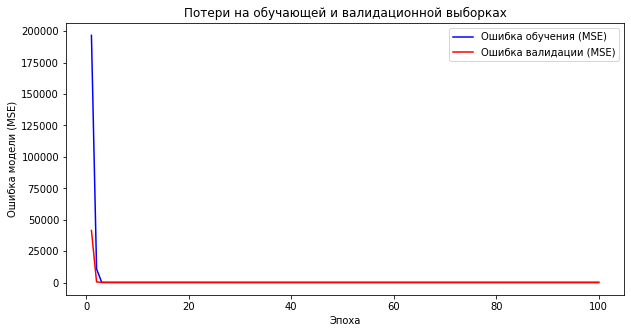

In [ ]:
loss_function = regres_model_hist.history['loss']
val_loss_function = regres_model_hist.history['val_loss']

epochs = range(1,epochs+1)

plt.figure(figsize=(10,5))
plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

y_pred = regres_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE: %f" % (mae))

88/88 [==============================] - 0s 1ms/step
MAE: 6.925191
